In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage import io, measure, filters

training_imgs_dir = "/raid/data/BBBC038/training/"

# Load All Data

In [2]:
from functions.load_all_data import load_imgs_masks

img_paths, img_names, mask_png_list, mask_colls = load_imgs_masks()

# Composite Mask of Nuclei Into Single Image
* use numpy to concactenate image arrays
* multiply each array by a different number to tell the difference when combining arrays

In [3]:
img = io.imread(img_paths[0])  # numpy.ndarray
masks = mask_colls[0]          # mask collection

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29.])

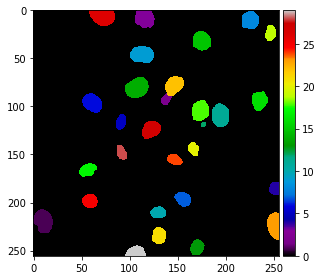

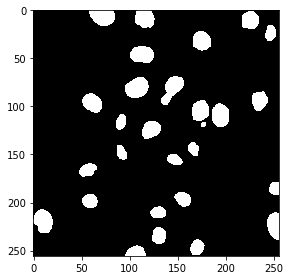

In [4]:
sample = np.zeros(img.shape[0:2])
for i in range(len(masks)):
    sample += (masks[i] > 0) * (i+1)
    # put all masks into a single image
    # multiply each mask by a unique value for easier visualization

io.imshow(sample, cmap='nipy_spectral')
plt.figure()
io.imshow(sample > 0, cmap='gray')
np.unique(sample)

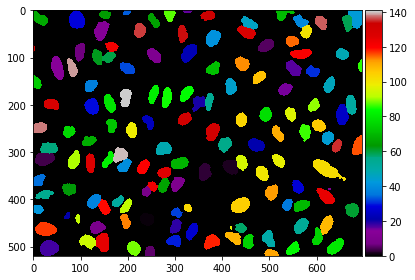

In [5]:
from functions.composites import composite_masks

comp = composite_masks(mask_colls[1])
nuclei = comp > 0
io.imshow(comp, cmap='nipy_spectral')

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


False


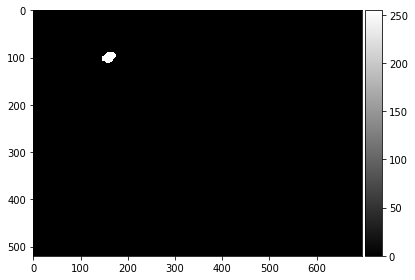

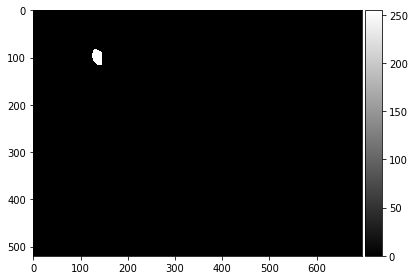

In [6]:
io.imshow(mask_colls[1][59], cmap='gray'); plt.figure()
io.imshow(mask_colls[1][61], cmap='gray')

# masks 61 and 59 appear to be one image in the above composite

ar1 = mask_colls[1][59]
ar2 = mask_colls[1][61]
comparison = ar1 == ar2

equal = comparison.all()
print(equal) # They are not, however. 

# Create Labelled Matrix
* Need to read documentation, etc.
* Apply random colors to masks before labelling

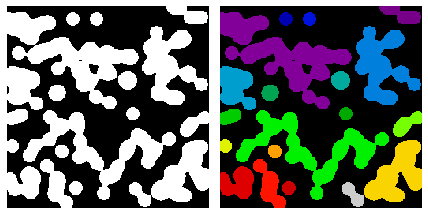

In [7]:
n = 12
l = 256
# np.random.seed(0)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

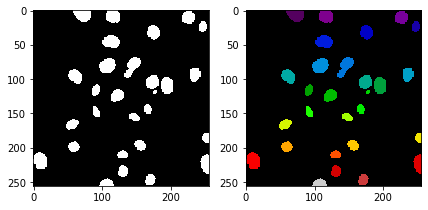

In [8]:
nuclei = sample > 0
all_labels = measure.label(nuclei)
nuclei_labels = measure.label(nuclei, background=0)

plt.figure(figsize=(9,3.5))
plt.subplot(131)
plt.imshow(nuclei, cmap='gray')

plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.tight_layout()
plt.show()
# issue at approx [75, 140]
# because nuclei are touching, label identifies them as one object
